In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,sunny
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [3]:
 import scipy
 import missingno as mso
 from scipy import stats
 from scipy.stats import ttest_ind
 from scipy.stats import pearsonr
 from sklearn.preprocessing import StandardScaler,LabelEncoder
 from sklearn.model_selection import train_test_split
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.svm import SVC
 from sklearn.ensemble import GradientBoostingClassifier
 from xgboost import XGBClassifier
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<Axes: xlabel='weather', ylabel='count'>

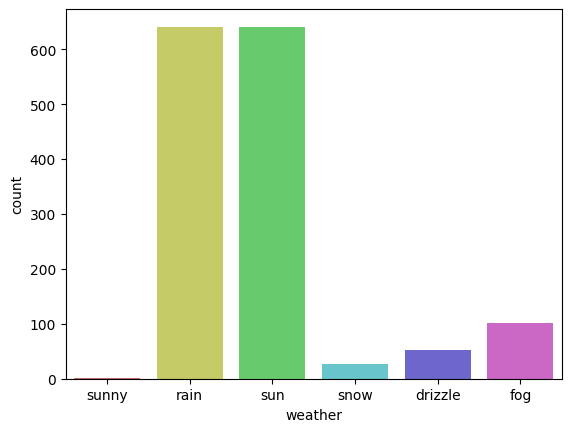

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data=data, palette='hls')

In [5]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.559206%
percent of snow:1.779603%
percent of fog:6.913073%


In [6]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

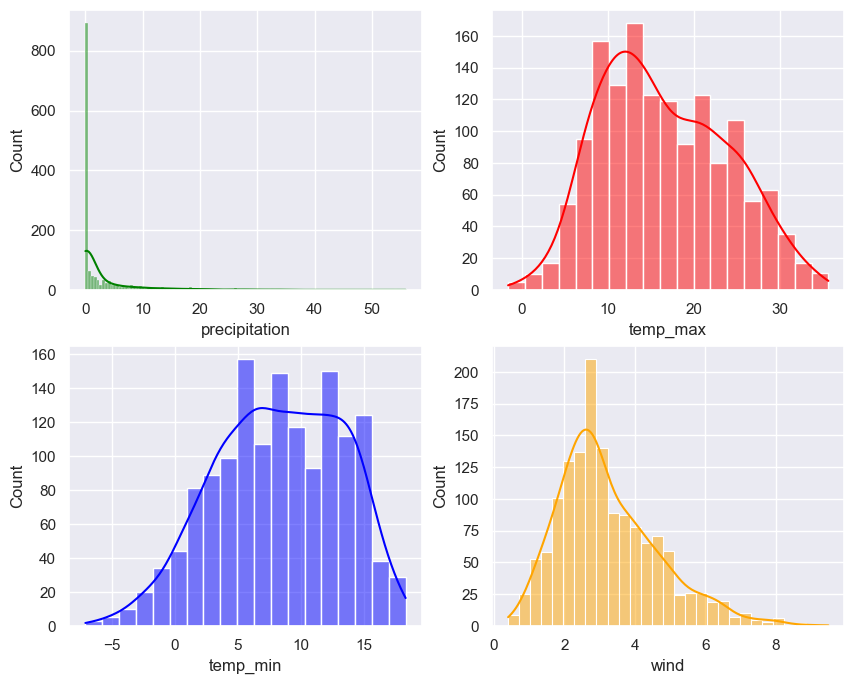

In [7]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

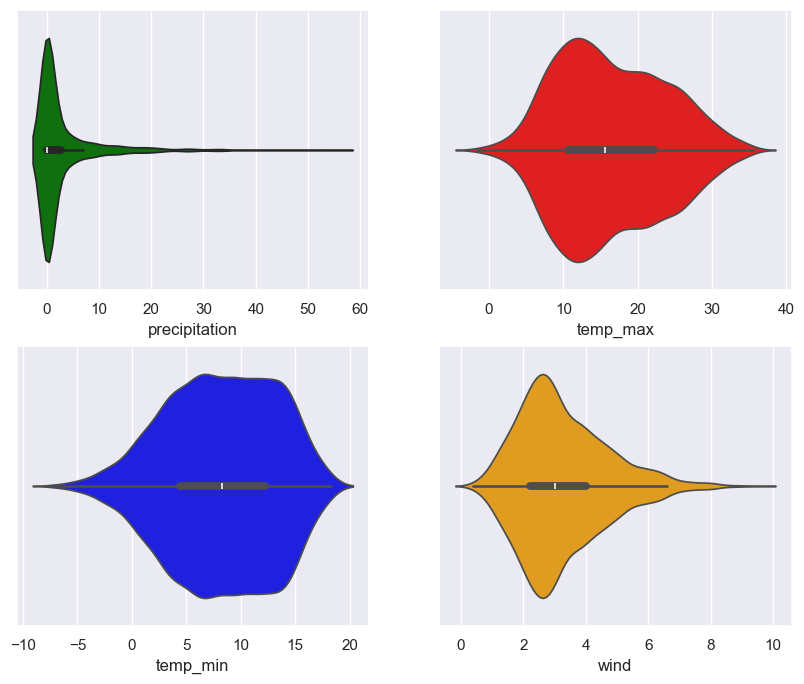

In [8]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data, x='precipitation', ax=axs[0, 0], color='green', bw=0.2)
sns.violinplot(data=data, x='temp_max', ax=axs[0, 1], color='red', bw=0.2)
sns.violinplot(data=data, x='temp_min', ax=axs[1, 0], color='blue', bw=0.2)
sns.violinplot(data=data, x='wind', ax=axs[1, 1], color='orange', bw=0.2)

<Axes: xlabel='precipitation', ylabel='weather'>

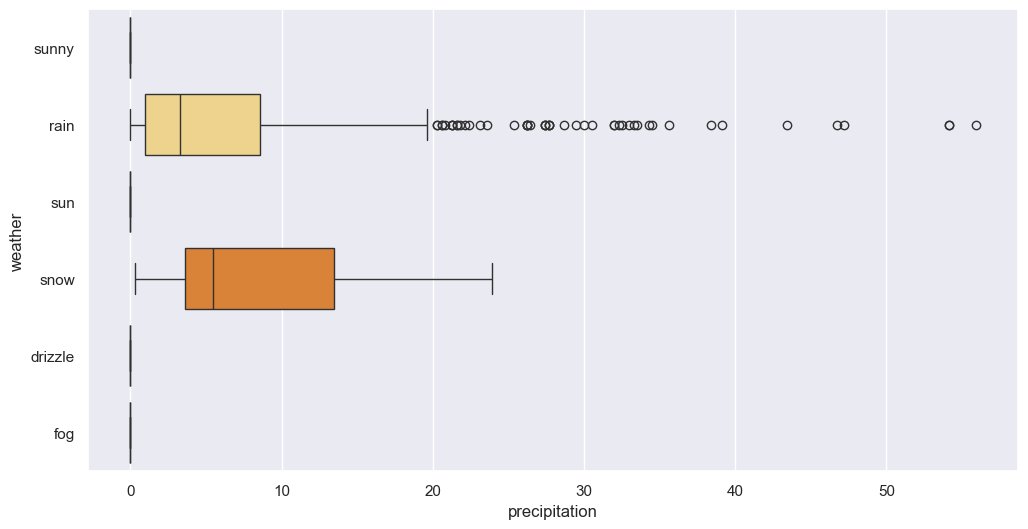

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='precipitation',y='weather',data=data,palette='YlOrBr')

<Axes: xlabel='temp_max', ylabel='weather'>

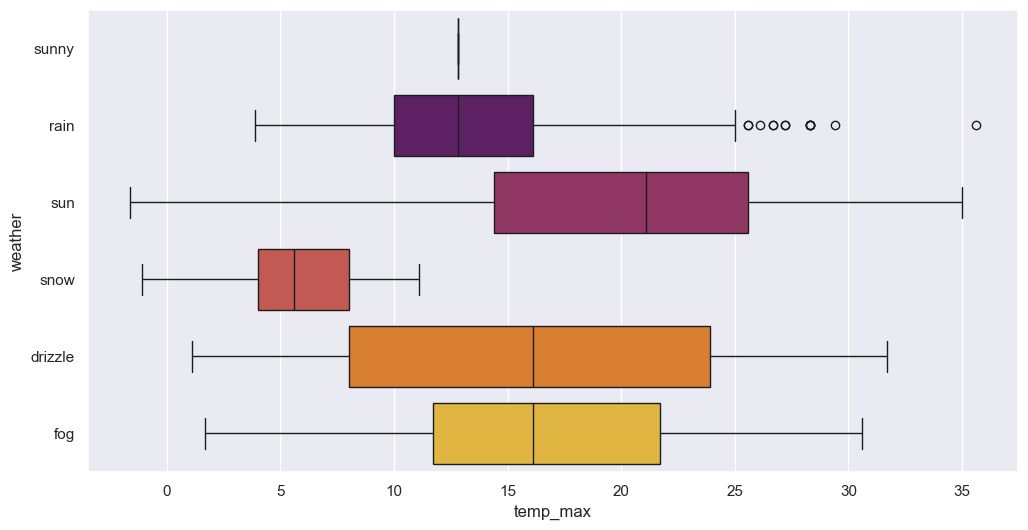

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_max',y='weather',data=data,palette='inferno')

<Axes: xlabel='wind', ylabel='weather'>

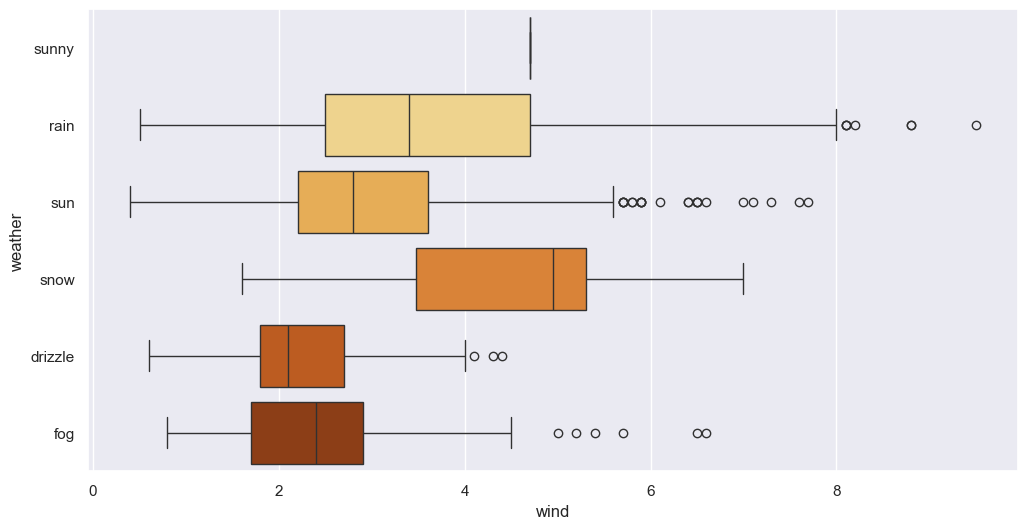

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='wind',y='weather',data=data,palette='YlOrBr')

<Axes: xlabel='temp_min', ylabel='weather'>

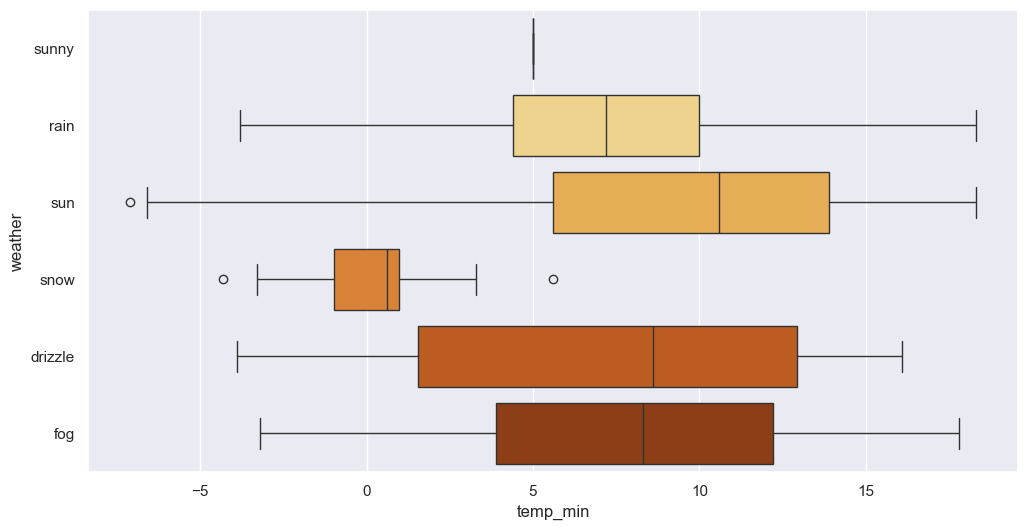

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_min',y='weather',data=data,palette='YlOrBr')

pearsons correlation:  -0.22855481643297043
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


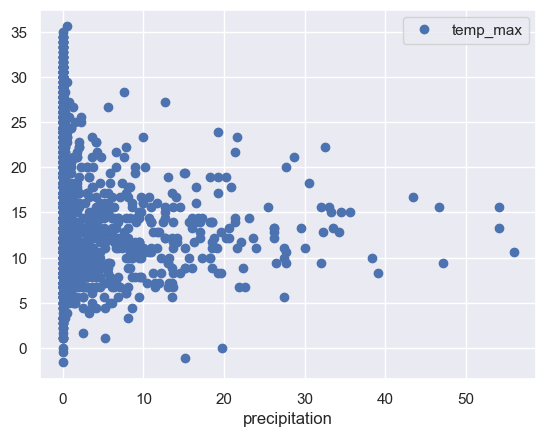

In [13]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495483
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


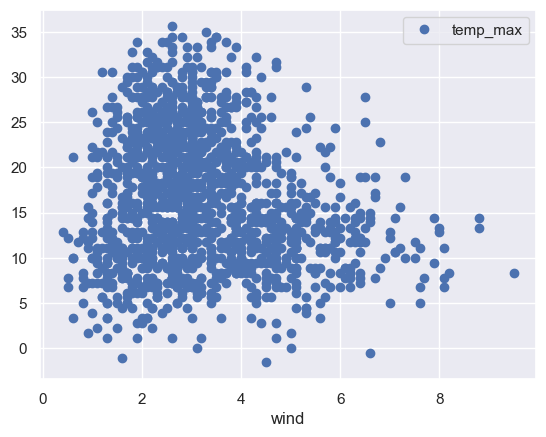

In [14]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

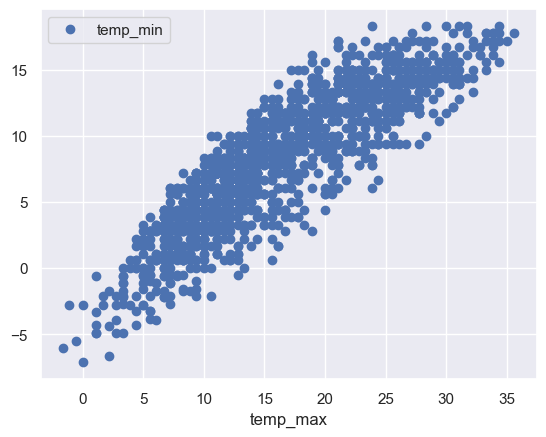

In [15]:
data.plot('temp_max','temp_min',style='o')

In [16]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

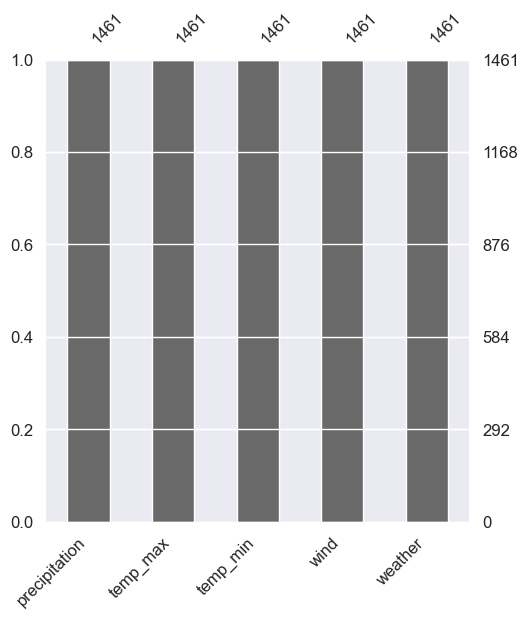

In [17]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [18]:
data=data.drop(['date'],axis=1)

In [19]:
# Q1=data.quantile(0.25)
# Q3=data.quantile(0.75)
# IQR=Q3-Q1
# data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

import numpy as np
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='wind', ylabel='Count'>

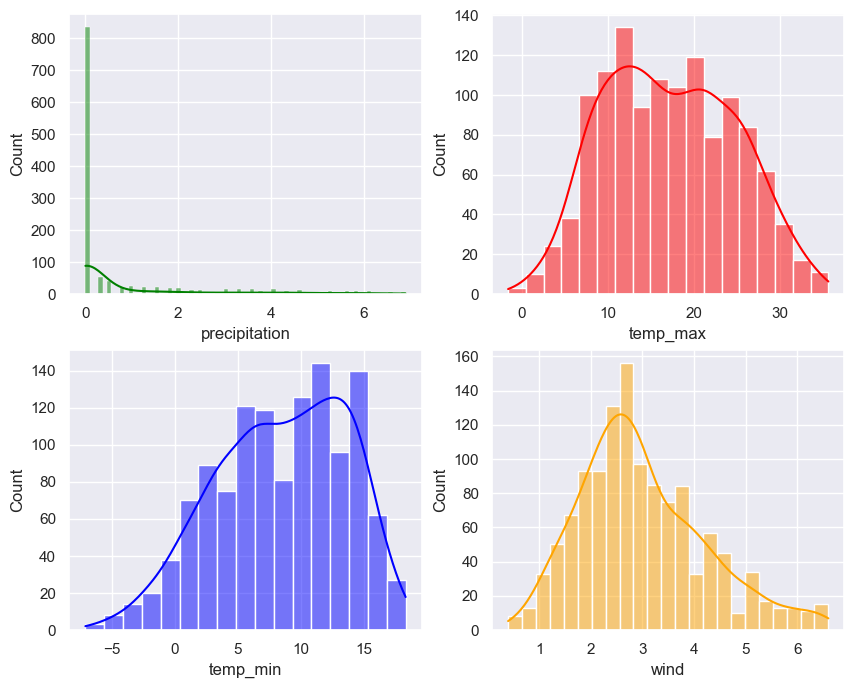

In [20]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [21]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,sunny
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain


In [22]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [23]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,5
2,0.8,11.7,7.2,2.3,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2


In [24]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [25]:
data.weather.unique()


array([5, 2, 4, 3, 0, 1])

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=4)

In [27]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
svm=SVC()
svm.fit(x_train,y_train)


SVC()

In [29]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)


GradientBoostingClassifier(max_depth=5, max_leaf_nodes=25, n_estimators=450,
                           subsample=0.5)

In [30]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)


LogisticRegression()

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [33]:
# Save the trained model to a file
import joblib
joblib.dump(nb, 'Nb.pkl')

['Nb.pkl']

In [34]:
import tkinter as tk
from tkinter import messagebox


In [35]:
# Load the trained model
model = joblib.load('Nb.pkl')

In [36]:
# Define a dictionary to map numerical predictions to weather categories
weather_mapping = {
    0: "Drizzle",
    1: "Fog",
    2: "Rain",
    3: "Snow",
    4: "Sunny"
}

In [37]:
def predict_weather():
    try:
        # Get input values from the user
        precipitation = float(precipitation_entry.get())
        temp_max = float(temp_max_entry.get())
        temp_min = float(temp_min_entry.get())
        wind = float(wind_entry.get())

        # Make prediction using the trained model
        prediction_index = model.predict([[precipitation, temp_max, temp_min, wind]])[0]

        # Map numerical prediction to weather category
        prediction = weather_mapping.get(prediction_index, "Unknown")

        # Display the predicted weather
        messagebox.showinfo("Weather Prediction", f"The predicted weather is: {prediction}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

In [38]:
# Create main application window
app = tk.Tk()
app.title("Weather Prediction")

''

In [39]:
# Create and pack widgets with improved styling
tk.Label(app, text="Enter Weather Parameters", font=("Helvetica", 14)).grid(row=0, columnspan=2, pady=10)

tk.Label(app, text="Precipitation (mm):", font=("Helvetica", 12)).grid(row=1, column=0, padx=10)
precipitation_entry = tk.Entry(app, font=("Helvetica", 12))
precipitation_entry.grid(row=1, column=1, padx=10)

tk.Label(app, text="Max Temperature (°C):", font=("Helvetica", 12)).grid(row=2, column=0, padx=10)
temp_max_entry = tk.Entry(app, font=("Helvetica", 12))
temp_max_entry.grid(row=2, column=1, padx=10)

tk.Label(app, text="Min Temperature (°C):", font=("Helvetica", 12)).grid(row=3, column=0, padx=10)
temp_min_entry = tk.Entry(app, font=("Helvetica", 12))
temp_min_entry.grid(row=3, column=1, padx=10)

tk.Label(app, text="Wind (km/h):", font=("Helvetica", 12)).grid(row=4, column=0, padx=10)
wind_entry = tk.Entry(app, font=("Helvetica", 12))
wind_entry.grid(row=4, column=1, padx=10)

predict_button = tk.Button(app, text="Predict Weather", command=predict_weather, font=("Helvetica", 12), bg="blue", fg="white")
predict_button.grid(row=5, columnspan=2, pady=20)

In [40]:
# Run the Tkinter event loop
app.mainloop()